<a href="https://colab.research.google.com/github/mikakia/Project-in-HealthCare/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import  missingno as msno

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict

import shap
from lime.lime_tabular import LimeTabularExplainer

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
import dice_ml


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
#print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
feature_names = X.columns
feature_names = ['id', 'diagnosis'] + feature_names.tolist()
print(feature_names)

['id', 'diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


#Exploring Dataset

In [ ]:
url = "https://raw.githubusercontent.com/mikakia/Project-in-HealthCare/main/wdbc.data"
df = pd.read_csv(url, sep=",",header=None,names=feature_names)
df.head()

,id,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.dtypes


,0
id,int64
diagnosis,object
radius1,float64
texture1,float64
perimeter1,float64
area1,float64
smoothness1,float64
compactness1,float64
concavity1,float64
concave_points1,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  569 non-null    int64  
 1   diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [ ]:
df.isna().sum()

,0
id,0
diagnosis,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0


#Preprocessing

In [ ]:
df.describe()

,id,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [ ]:
df['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


###Plots

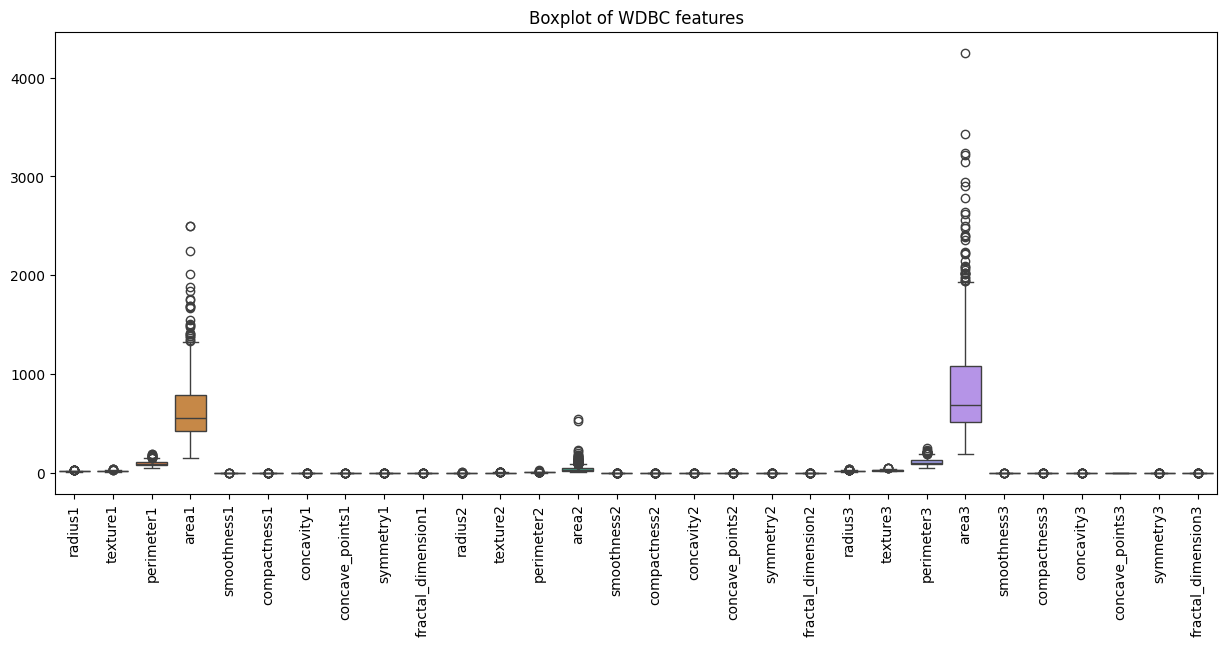

In [ ]:
df_no_id_dg = df.drop(['id', 'diagnosis'], axis=1)

plt.figure(figsize=(15,6))
sns.boxplot(data=df_no_id_dg)
plt.xticks(rotation=90)
plt.title("Boxplot of WDBC features")
plt.show()


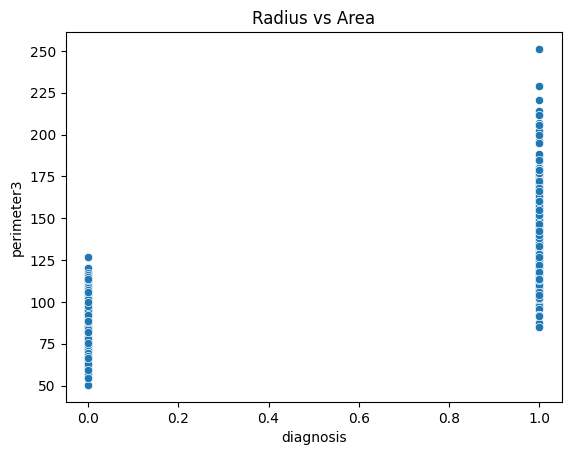

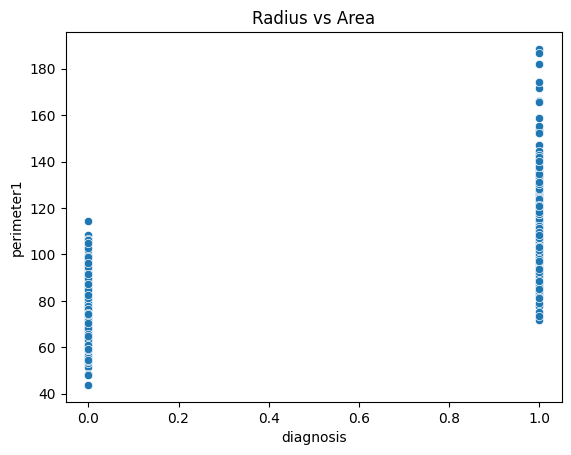

In [ ]:
sns.scatterplot(y='perimeter3', x='diagnosis', data=df)
plt.title("Radius vs Area")
plt.show()

sns.scatterplot(y='perimeter1', x='diagnosis', data=df)
plt.title("Radius vs Area")

plt.show()

                  id   radius1  texture1  perimeter1     area1  smoothness1  \
id          1.000000  0.074626  0.099770    0.073159  0.096893    -0.012968   
radius1     0.074626  1.000000  0.323782    0.997855  0.987357     0.170581   
texture1    0.099770  0.323782  1.000000    0.329533  0.321086    -0.023389   
perimeter1  0.073159  0.997855  0.329533    1.000000  0.986507     0.207278   
area1       0.096893  0.987357  0.321086    0.986507  1.000000     0.177028   

            compactness1  concavity1  concave_points1  symmetry1  ...  \
id              0.000096    0.050080         0.044158  -0.022114  ...   
radius1         0.506124    0.676764         0.822529   0.147741  ...   
texture1        0.236702    0.302418         0.293464   0.071401  ...   
perimeter1      0.556936    0.716136         0.850977   0.183027  ...   
area1           0.498502    0.685983         0.823269   0.151293  ...   

             radius3  texture3  perimeter3     area3  smoothness3  \
id          0.082

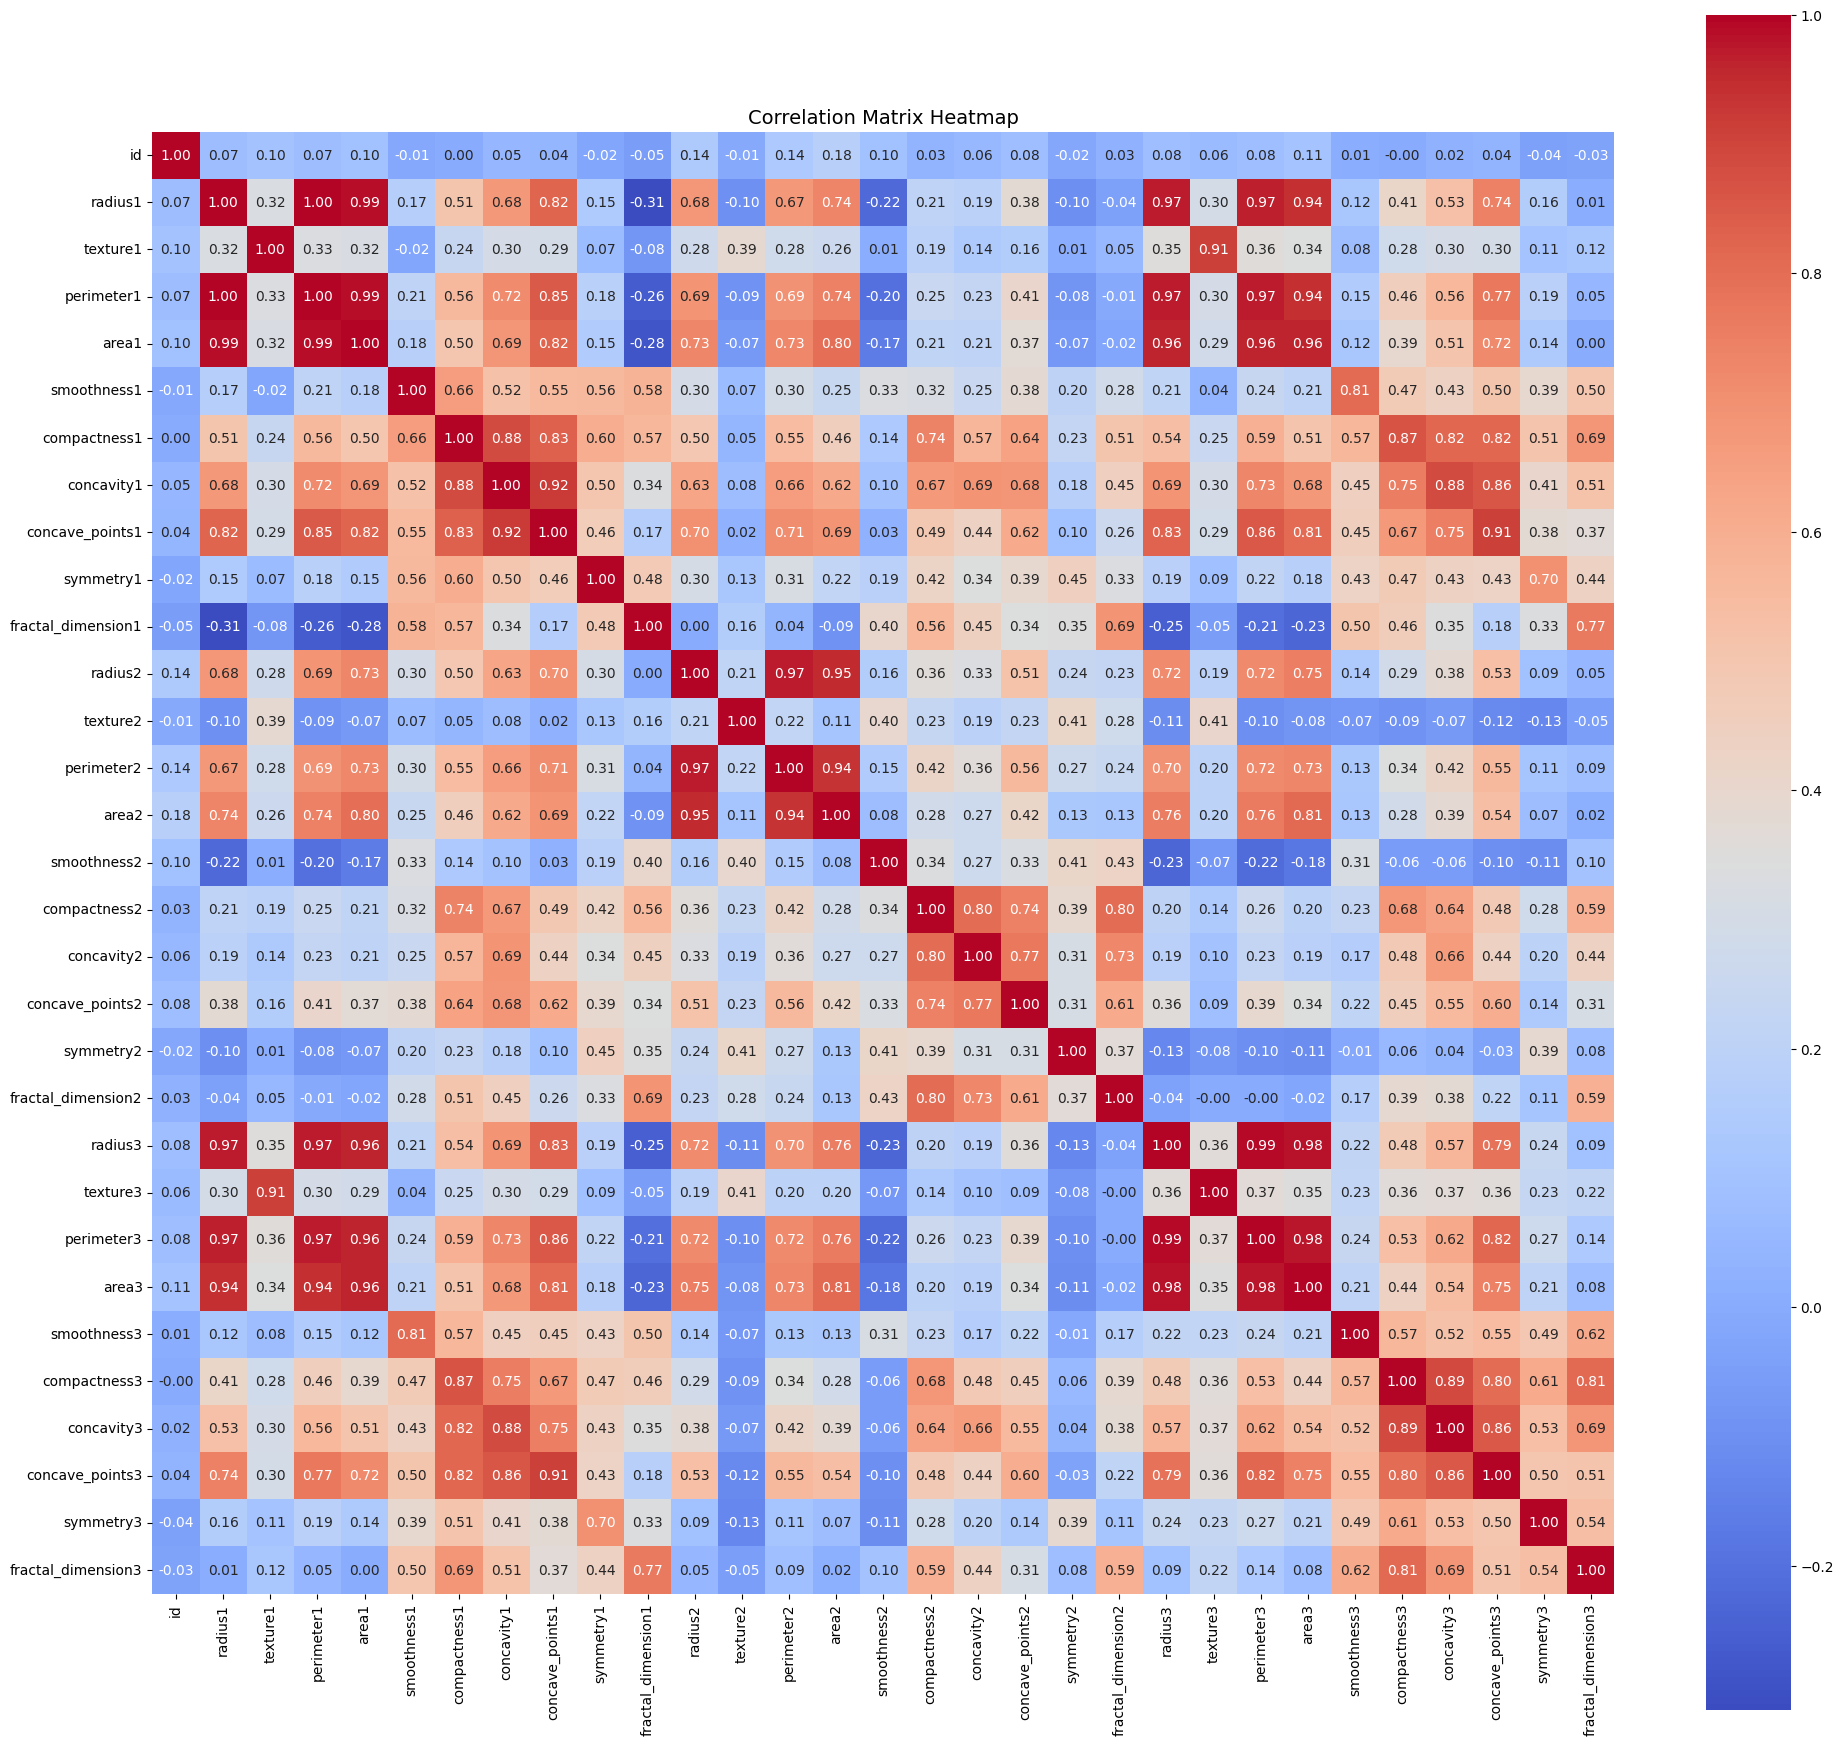

In [ ]:
#  correlation matrix and heatmap
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix.head())
plt.figure(figsize=(20, 18))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values in cells
    fmt=".2f",         # format to 2 decimals
    cmap="coolwarm",   # color palette (red = positive, blue = negative)
    square=True
)

plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

##Outlier check

In [ ]:
print("Min value:", df['area1'].min())
print("Max value:", df['area1'].max())

Min value: 143.5
Max value: 2501.0


In [ ]:
#check for outliers in areas (mean per patient)
area_columns = ['area1', 'area2', 'area3']
mean_area_per_patient = df[area_columns].mean(axis=1)  # axis=1 means row-wise
print(mean_area_per_patient.max())

2432.4


In [ ]:
#check for outliers in radius (mean per patient)
area_columns = ['radius1', 'radius2', 'radius3']
mean_area_per_patient = df[area_columns].mean(axis=1)  # axis=1 means row-wise
print(mean_area_per_patient.min())


5.0450333333333335


The mean of smoothness is 0.12 > 0.2 where 0.2 the max expected mean. It can be measurement error.

In [ ]:
#check for outliers in smoothness (mean per patient)
area_columns = ['smoothness1', 'smoothness2', 'smoothness3']
mean_area_per_patient = df[area_columns].mean(axis=1)  # axis=1 means row-wise
print(mean_area_per_patient.max())


0.12124133333333333


###Check the outliers ranges for smoothness1,2,3
normal extreme values indicating suspicious/malignant cell

In [ ]:
cols = ['smoothness1','smoothness2','smoothness3']

for col in cols:

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Show outlier rows
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(outliers[[col]])


     smoothness1
3        0.14250
105      0.13980
122      0.14470
504      0.16340
520      0.13710
568      0.05263
     smoothness2
71       0.01721
76       0.01340
110      0.01385
111      0.01291
116      0.01835
122      0.02333
173      0.01496
176      0.01286
185      0.01439
196      0.01380
212      0.01345
213      0.03113
245      0.01604
273      0.01380
275      0.01418
288      0.01574
314      0.02075
332      0.01289
345      0.01736
391      0.01582
416      0.01474
424      0.01307
469      0.01459
505      0.02177
507      0.01262
520      0.01546
537      0.01288
538      0.01266
539      0.01547
556      0.01291
     smoothness3
3        0.20980
41       0.19090
192      0.07117
203      0.22260
379      0.21840
504      0.19020
505      0.20060


##Standarlization

In [ ]:
features = df.drop(['id', 'diagnosis'], axis=1)
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)
scaled_df_sel_feat= pd.DataFrame(scaled_features, columns=features.columns)

df_scaled = pd.concat([df[['id', 'diagnosis']], scaled_df_sel_feat], axis=1)

df_scaled.head()



,id,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#Training and Test

In [ ]:
X = df_scaled.drop(['id', 'diagnosis'], axis=1)
y = df_scaled['diagnosis']

In [ ]:
X_notscaled = df.drop(['id', 'diagnosis'], axis=1)
y_notscaled = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_notscaled, y_notscaled, test_size=0.2, random_state=42, stratify=y_notscaled)

##KNN with k folds
Accuracy: 97%

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=14, shuffle=True, random_state=42)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

Accuracy for each fold: [0.95121951 0.95121951 1.         1.         0.97560976 1.
 0.97560976 0.95121951 0.97560976 1.         0.975      0.95
 0.925      0.95      ]
Mean accuracy: 0.9700348432055749


In [ ]:
y_pred_knn = cross_val_predict(knn, X, y, cv=kf)
results = pd.DataFrame({'True': y, 'Predicted': y_pred_knn})
print(results.head(20))

    True  Predicted
0      1          1
1      1          1
2      1          1
3      1          1
4      1          1
5      1          1
6      1          1
7      1          1
8      1          1
9      1          1
10     1          1
11     1          1
12     1          1
13     1          1
14     1          1
15     1          1
16     1          1
17     1          1
18     1          1
19     0          0


Text(0.5, 0, 'Actual')

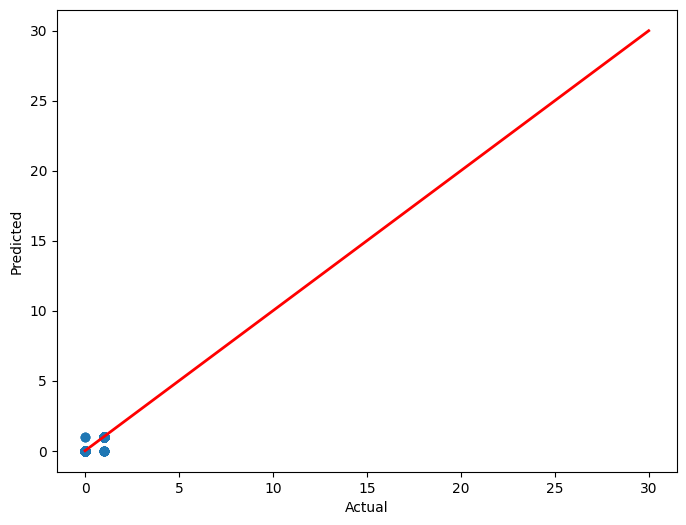

In [ ]:
# model evaluation plot
plt.figure(figsize = (8,6))
plt.scatter(results['True'], results['Predicted'])
plt.plot([0,30], [0,30], color='r',linestyle='-',linewidth=2)
plt.ylabel('Predicted')
plt.xlabel('Actual')



###KNN without kfolds
Accuracy: 96%

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matric\n",confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matric
 [[71  1]
 [ 4 38]]


##Random Forest
Accuracy: 97%

In [ ]:
rf_model = RandomForestClassifier(n_estimators=30,max_depth=None,random_state=42)
rf_model.fit(X_train_ns, y_train_ns)

RandomForestClassifier(n_estimators=30, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_ns)
print("Accuracy:", accuracy_score(y_test_ns, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_ns, y_pred_rf))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



##Neural Network
Accuracy: 97%%

In [ ]:

nn_model = MLPClassifier(hidden_layer_sizes=(30,15), activation='relu', max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30, 15), max_iter=500, random_state=42)

In [ ]:
y_pred_nn = nn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



##SVM with rbf
Accuracy: 97%

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



#Explainability

## SHAP

In [ ]:
explainer = shap.Explainer(rf_model)
shap_values = explainer(X_notscaled)

In [ ]:
np.shape(shap_values.values)

(569, 30, 2)

--- SHAP waterfall for Malignant ---


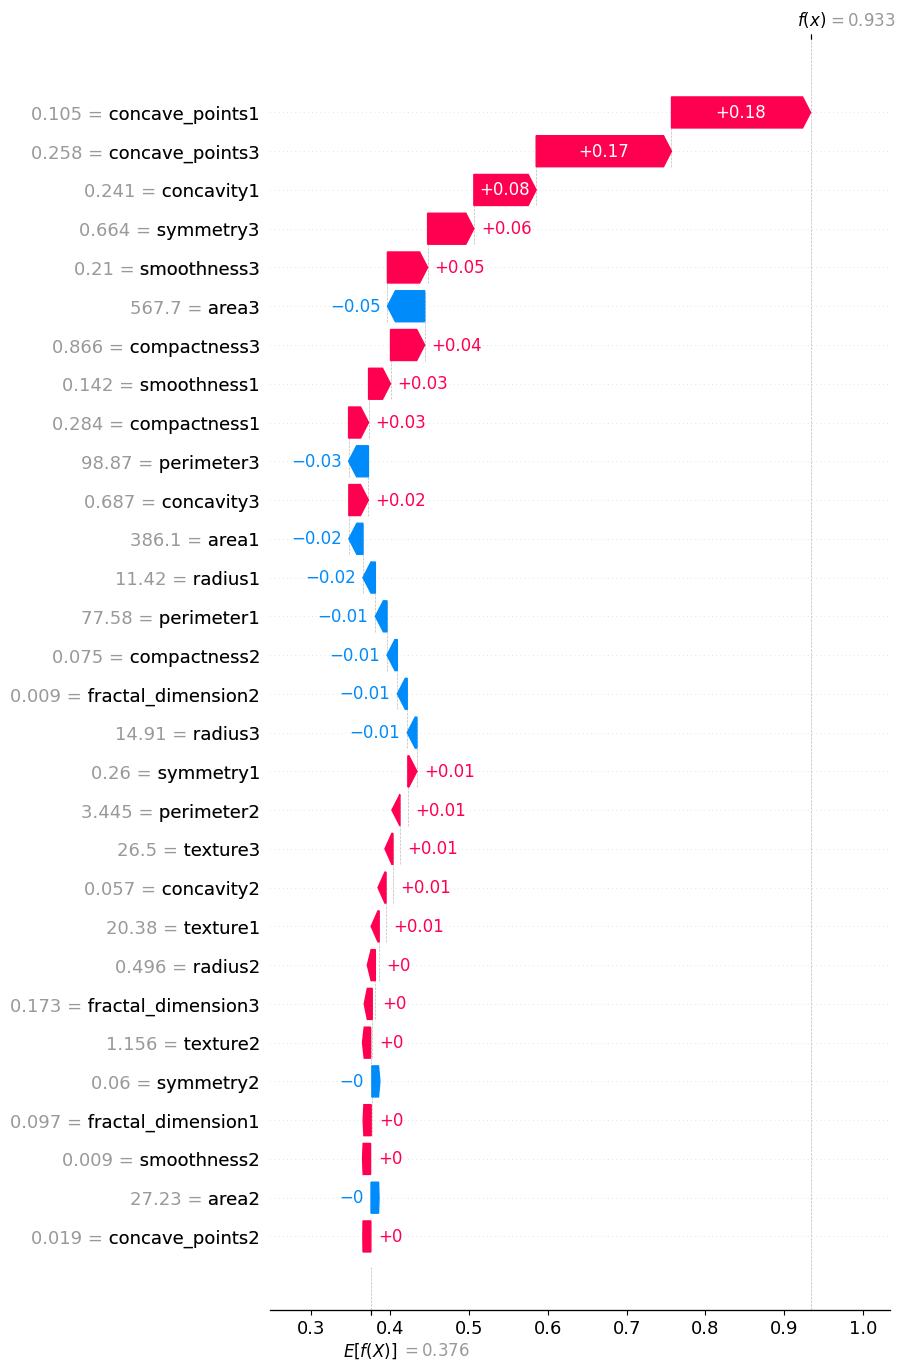

In [ ]:
i = 3         #row
class_idx = 1 #class

n_feats = len(X_notscaled.columns) # features


vals = shap_values.values[i, :, class_idx]
bv   = shap_values.base_values
base_val = float(bv[class_idx] if bv.ndim==1 else bv[i, class_idx])

exp = shap.Explanation(
    values=vals,
    base_values=base_val,
    data=shap_values.data[i],
    feature_names=getattr(shap_values, "feature_names", getattr(X_notscaled, "columns", None))
)
if class_idx == 0:
  print(f"--- SHAP waterfall for Benign ---")
elif class_idx == 1:
  print(f"--- SHAP waterfall for Malignant ---")
else:
  print('Error')

shap.plots.waterfall(exp,max_display=n_feats)



In [ ]:
shap_values_array = shap_values.values[:,:,1] # class 1
mean_shap = np.abs(shap_values_array).mean(axis=0) # Mean absolute SHAP value per feature
shap_importance = pd.Series(mean_shap, index=X_train_ns.columns)

shap_importance = shap_importance.sort_values(ascending=False)

top_features = shap_importance.head(10)
print("Top influential features based on SHAP for Malignant: ")
print(top_features)


Top influential features based on SHAP for Malignant: 
area3                 0.064603
concave_points1       0.056174
concave_points3       0.049983
perimeter3            0.044875
radius3               0.034786
radius1               0.031611
concavity1            0.031385
area2                 0.031340
area1                 0.029778
perimeter1            0.024252
concavity3            0.019004
radius2               0.013336
texture3              0.013063
texture1              0.012466
compactness3          0.010102
smoothness3           0.007751
compactness1          0.006883
symmetry3             0.006642
smoothness1           0.004882
perimeter2            0.004123
compactness2          0.003248
fractal_dimension3    0.002970
fractal_dimension1    0.002647
concavity2            0.002646
concave_points2       0.002497
texture2              0.002454
fractal_dimension2    0.002357
symmetry1             0.002153
symmetry2             0.001909
smoothness2           0.001584
dtype: float64


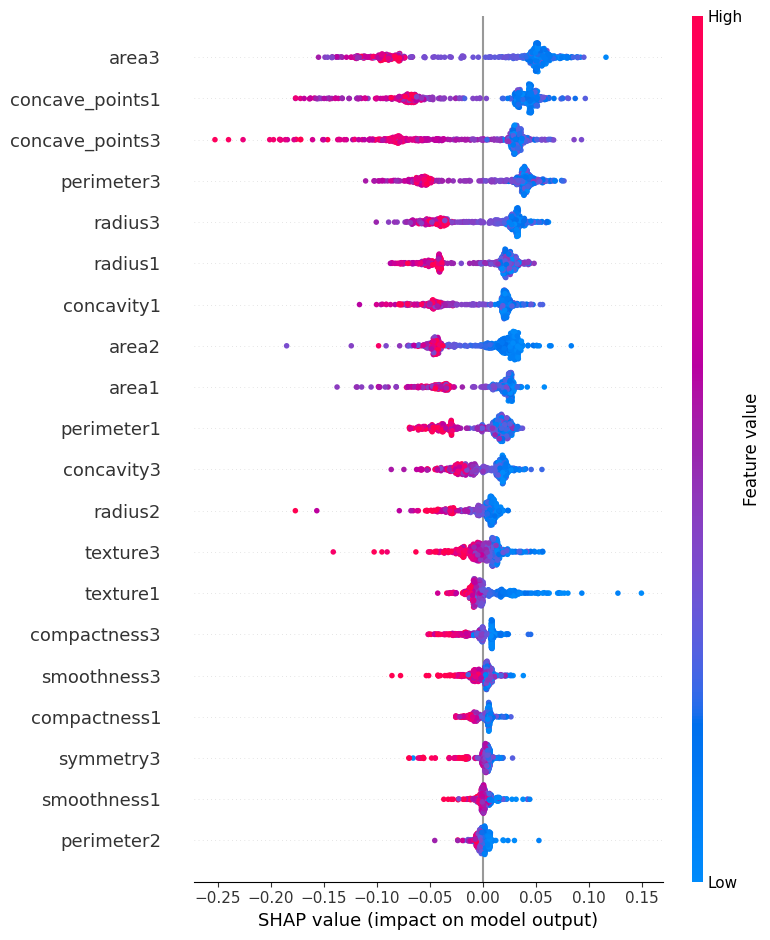

In [ ]:
# class 0
#shap.summary_plot(shap_values.values[:, :, 0], shap_values.data, feature_names=X_notscaled.columns)

# class 1
shap.summary_plot(shap_values.values[:, :, 1], shap_values.data, feature_names=X_notscaled.columns)


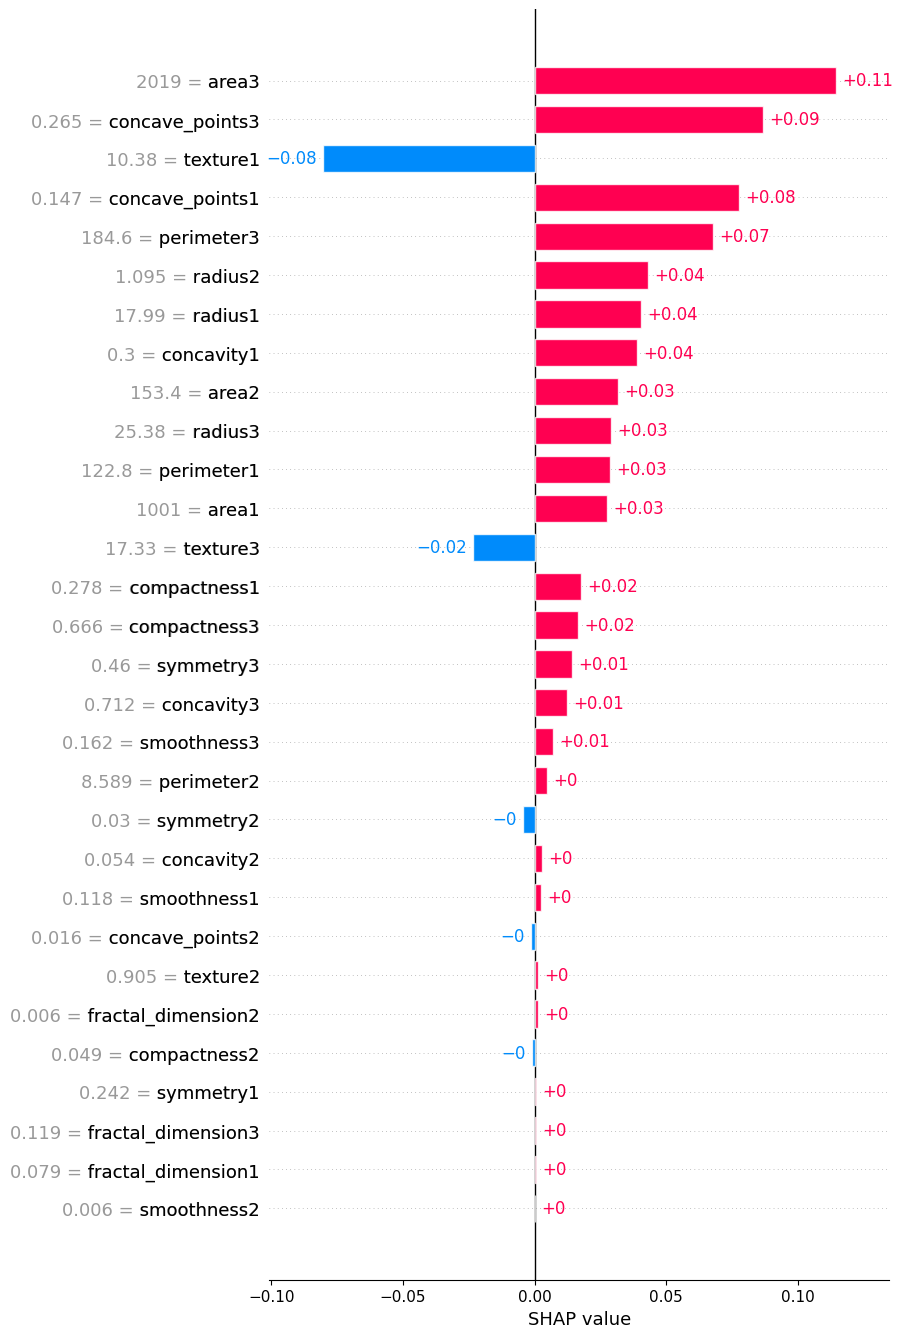

In [ ]:
i = 0              # sample
class_idx = 1      # class

explanation = shap.Explanation(
    values        = shap_values.values[i, :, class_idx],
    base_values   = shap_values.base_values[class_idx],    # baseline for class 1
    data          = shap_values.data[i],                   # feature values for row 0
    feature_names = X_notscaled.columns
)

shap.plots.bar(explanation,n_feats)


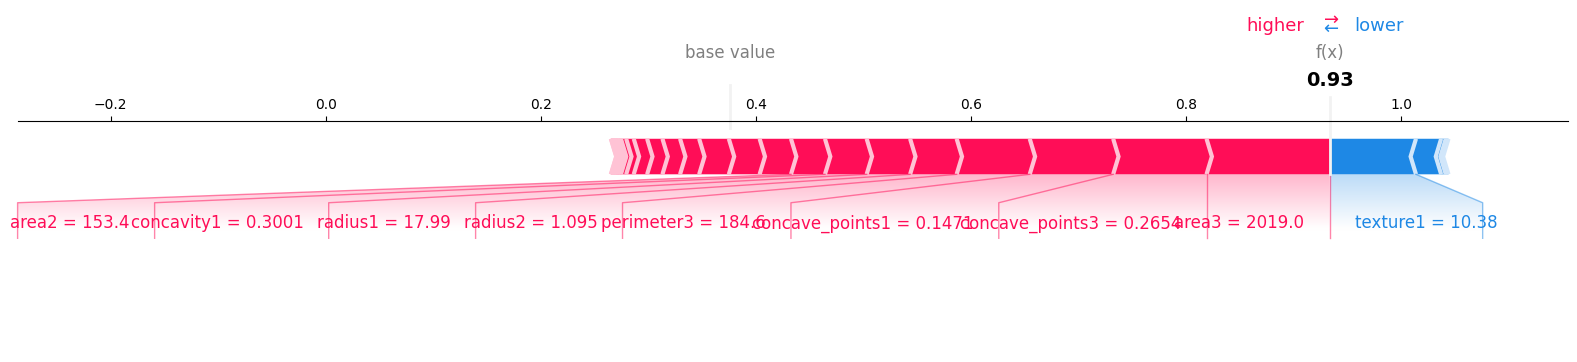

In [ ]:
shap.plots.force(
    base_val,
    shap_values.values[i, :, class_idx],
    shap_values.data[i],
    feature_names=X_notscaled.columns,
    matplotlib=True   # renders as an image, couldn't run the dynamic version
)


## LIME

In [ ]:
explainer = LimeTabularExplainer(X.values,
                                 feature_names=X.columns,
                                 class_names=['diagnosis'],
                                 mode='regression',
                                 random_state=101)


In [ ]:
# explainer for the first prediction
exp = explainer.explain_instance(X.iloc[0],
                                 knn.predict,
                                 labels=X.columns
                                 )

/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
exp.show_in_notebook(show_table=True)

## PDB AND ICE PLOTS

### PDB

In [ ]:
pdb_lines = partial_dependence(rf_model,
                               X_notscaled,
                               ['area3'],
                               percentiles=(0,1),
                               grid_resolution=100,
                               kind='individual'    # predictions for individual lines
                               )
len(pdb_lines['individual'][0])

569

In [ ]:
print(pdb_lines.keys())

dict_keys(['grid_values', 'individual'])


In [ ]:
print(np.shape(pdb_lines['individual']))
print(np.shape(pdb_lines['grid_values']))

(1, 569, 100)
(1, 100)


[0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]


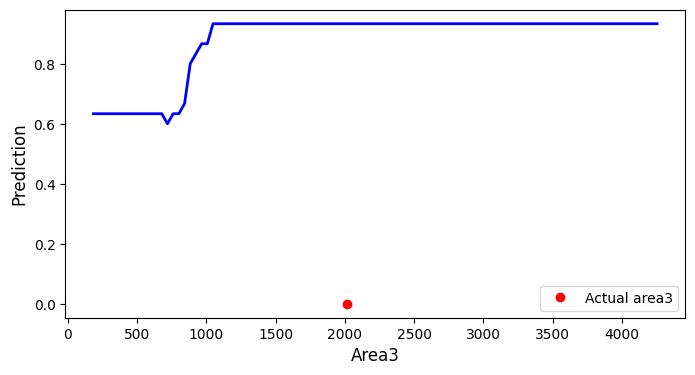

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(pdb_lines['grid_values'][0],pdb_lines['individual'][0][0],linewidth=2,color='blue')

per_0 = df.iloc[0] # actual area

plt.plot(per_0['area3'],y_pred_rf[0],'ro',label='Actual area3')
plt.ylabel('Prediction',size=12)
plt.xlabel('Area3',size=12)
plt.legend(loc='lower right')
print(y_pred_rf)

### ICE

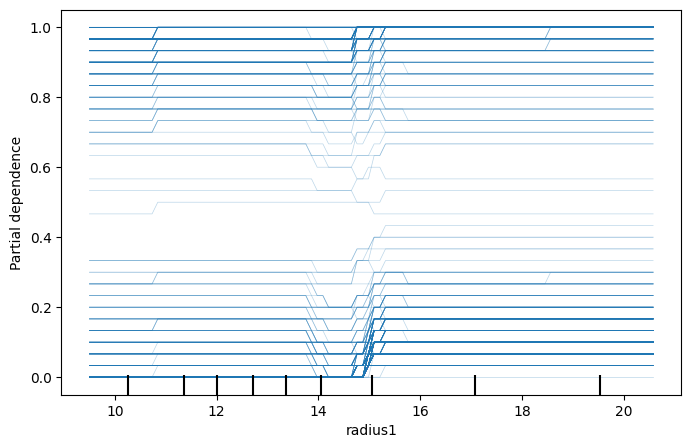

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(rf_model, X_notscaled, features=[0], kind='individual', ax=ax)
plt.show()

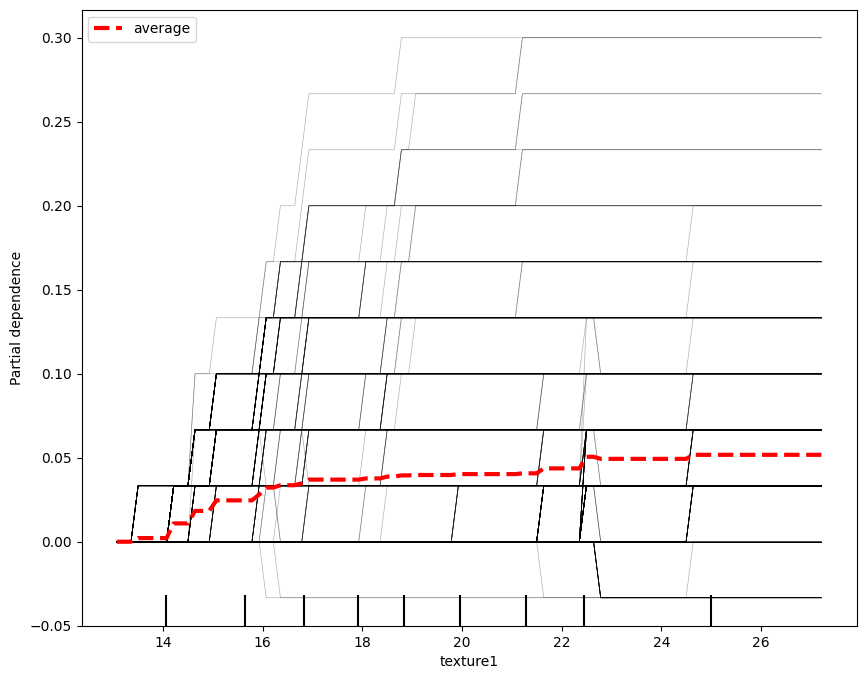

In [ ]:
features = [1]
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
PartialDependenceDisplay.from_estimator(rf_model,
                                        X_notscaled,
                                        features=features,
                                        kind='both',
                                        centered=True,
                                        ice_lines_kw={'color':'black'},
                                        pd_line_kw={'color':'red','lw':'3','linestyle':'--'},
                                        ax=ax)

## DiCE

I had hard time here to manage to display only the top 10 features found by SHAP (# Top features
top_features = shap_importance.head(10)). I never managaged to do it.

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)

d = dice_ml.Data(
    dataframe=train_df,
    continuous_features=top_features.index.tolist() ,
    outcome_name='diagnosis'


In [ ]:
m = dice_ml.Model(model=knn, backend='sklearn')
exp = dice_ml.Dice(d, m, method='random')

In [ ]:
counterfactuals = exp.generate_counterfactuals(
    query_instances=X_test.iloc[[0]],
    total_CFs=3,
    desired_class="opposite",
    features_to_vary=top_features.index.tolist()
)
counterfactuals.visualize_as_dataframe()

100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

Query instance (original outcome : 0)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
0,-0.771749,-1.970944,-0.767334,-0.715545,-0.187185,-0.71051,-0.673942,-0.585243,-0.527994,-0.236401,...,-1.580761,-0.700599,-0.650574,0.983301,-0.097107,-0.297391,-0.381064,0.18644,0.071164,0



Diverse Counterfactual set (new outcome: 1)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
0,-0.771749,-1.970944,-0.767334,-0.715545,-0.187185,-0.71051,-0.673942,-0.585243,-0.527994,-0.236401,...,1.028090,-0.700599,-0.650574,0.983301,-0.097107,-0.297391,-0.381064,5.956751,0.071164,1
1,-0.771749,-1.970944,-0.767334,-0.715545,0.548253,-0.71051,-0.673942,-0.585243,-0.527994,-0.236401,...,-1.580761,-0.700599,-0.650574,0.983301,-0.097107,-0.297391,-0.381064,0.186440,0.071164,1
2,-0.771749,-0.544632,-0.767334,-0.715545,-0.187185,-0.71051,-0.673942,-0.585243,-0.527994,-0.236401,...,-1.580761,-0.700599,4.109729,0.983301,-0.097107,-0.297391,-0.381064,0.186440,0.071164,1


In [ ]:
existing_top_features = [f for f in top_features_list if f in cf_df.columns] # top features?


In [ ]:
for i, cf in cf_df.iterrows():
    changes = {col: cf[col] - original.iloc[0][col]     # top features that  changed?
               for col in existing_top_features
               if cf[col] != original.iloc[0][col]}
    print(f"Counterfactual {i+1}: Changes {changes} → Predicted class: {int(cf['diagnosis'])}")


Counterfactual 1: Changes {'area3': np.float64(6.27406324967804), 'concave_points1': np.float64(-2.3700955642524946e-08), 'concave_points3': np.float64(1.144478112280467e-08), 'perimeter3': np.float64(-2.4828159195244837e-08), 'radius3': np.float64(4.2366816721539635e-09), 'radius1': np.float64(7.634161636183023e-09), 'concavity1': np.float64(9.035499459741914e-09), 'area2': np.float64(-2.8060416878972205e-08), 'area1': np.float64(9.693967295554273e-09), 'perimeter1': np.float64(1.1080533934837433e-08), 'concavity3': np.float64(-1.0465152633365449e-09), 'radius2': np.float64(7.157639081166626), 'texture3': np.float64(4.4879574723211135e-08), 'texture1': np.float64(-1.4159174277494913e-08), 'compactness3': np.float64(8.71403532665127e-10), 'smoothness3': np.float64(-1.078028000200959e-08), 'compactness1': np.float64(-1.6573472039205228e-08), 'symmetry3': np.float64(-1.0318340626369604e-09), 'smoothness1': np.float64(-1.422409690032822e-10), 'perimeter2': np.float64(-2.7653573875241477e-

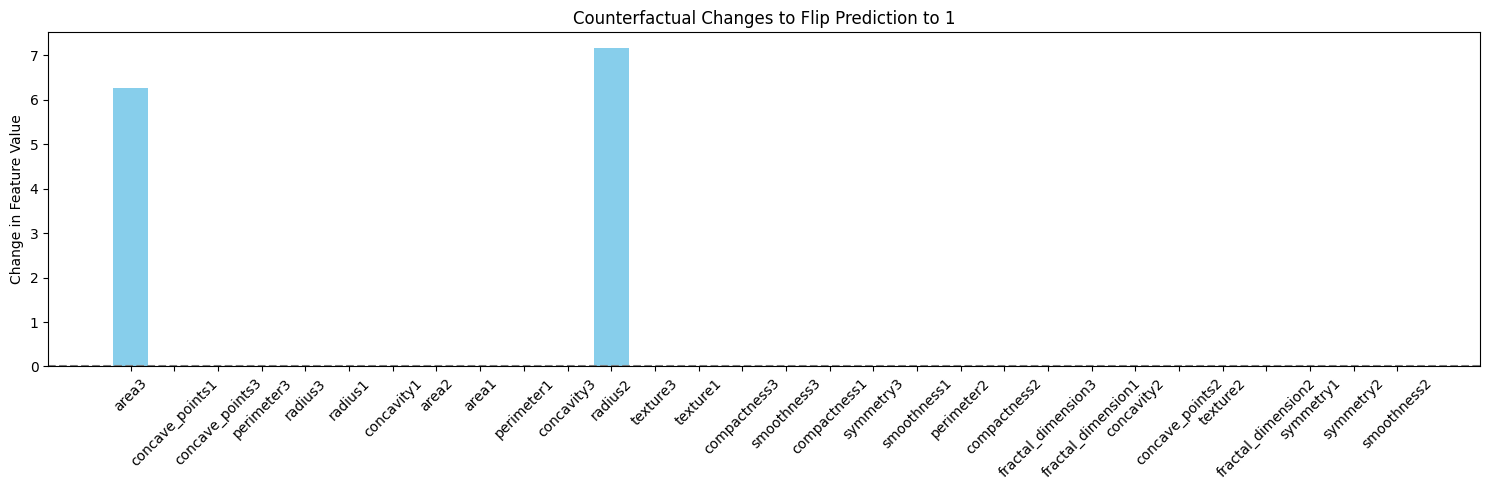

In [ ]:
cf = cf_df.iloc[0] # first counterfactual
changes = {col: cf[col] - original.iloc[0][col]
           for col in existing_top_features
           if cf[col] != original.iloc[0][col]}

plt.figure(figsize=(15, 5))
plt.bar(changes.keys(), changes.values(), color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Change in Feature Value')
plt.title(f'Counterfactual Changes to Flip Prediction to {int(cf["diagnosis"])}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
